In [1]:
# import and preview data 
import pandas as pd
df = pd.read_csv('/Users/christianmoya/downloads/commonlitreadabilityprize/train.csv')
df

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845
...,...,...,...,...,...,...
2829,25ca8f498,https://sites.ehe.osu.edu/beyondpenguins/files...,CC BY-SA 3.0,When you think of dinosaurs and where they liv...,1.711390,0.646900
2830,2c26db523,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,So what is a solid? Solids are usually hard be...,0.189476,0.535648
2831,cd19e2350,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,The second state of matter we will discuss is ...,0.255209,0.483866
2832,15e2e9e7a,https://en.wikibooks.org/wiki/Geometry_for_Ele...,CC BY-SA 3.0,Solids are shapes that you can actually touch....,-0.215279,0.514128


### EDA 

count    2834.000000
mean       -0.959319
std         1.033579
min        -3.676268
25%        -1.690320
50%        -0.912190
75%        -0.202540
max         1.711390
Name: target, dtype: float64


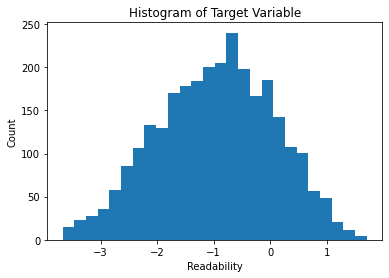

In [2]:
# plot out histogram of target variable 
import matplotlib.pyplot as plt
plt.hist(df['target'], bins='auto', color='')
plt.xlabel('Readability')
plt.ylabel('Count')
plt.title('Histogram of Target Variable');

print(df['target'].describe())

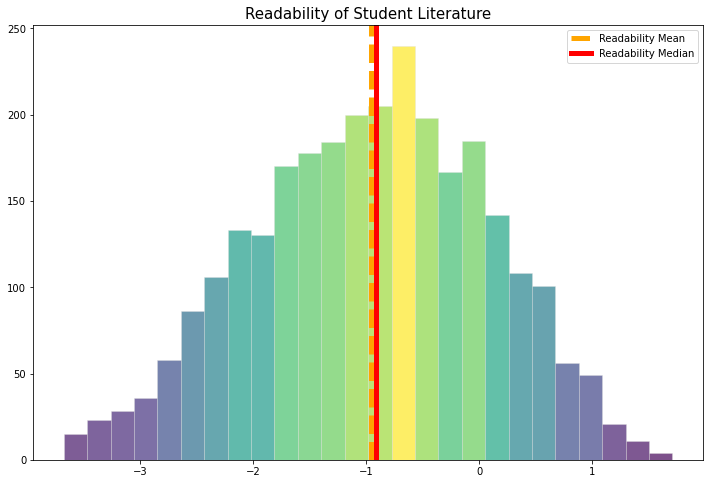

In [57]:
plt.subplots(figsize=[12,8])
n, bins, patches = plt.hist(df['target'], bins='auto', facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
plt.title('Readability of Student Literature', fontsize=15)
plt.axvline(-0.959, color='orange', label='Readability Mean', linewidth=5, linestyle='dashed')
plt.axvline(-0.912, color='red', label='Readability Median', linewidth=5)
plt.legend();

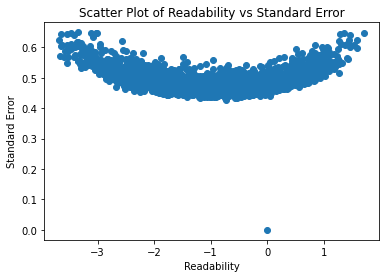

In [3]:
# plot relationship between target and standard error 
plt.scatter(df['target'], df['standard_error'])
plt.xlabel('Readability')
plt.ylabel('Standard Error')
plt.title('Scatter Plot of Readability vs Standard Error');

count    2834.000000
mean      172.982004
std        16.974390
min       135.000000
25%       159.000000
50%       175.000000
75%       188.000000
max       205.000000
Name: word_count, dtype: float64


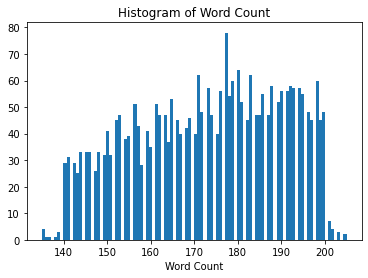

In [4]:
# word count
df['word_count'] = df['excerpt'].apply(lambda x: len(str(x).split()))
print(df['word_count'].describe())
plt.hist(df.word_count, bins = 100)
plt.title("Histogram of Word Count")
plt.xlabel('Word Count')
plt.show();

Text(0.5, 1.0, 'Relationship Between Word Count and Text Readability')

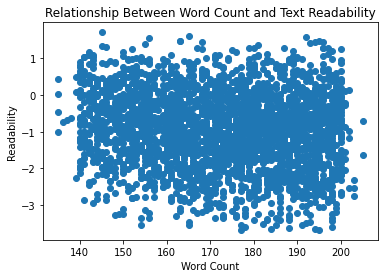

In [5]:
plt.scatter(df['word_count'], df['target'])
plt.xlabel('Word Count')
plt.ylabel('Readability')
plt.title('Relationship Between Word Count and Text Readability')

count    2834.000000
mean        9.034933
std         3.977946
min         2.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        34.000000
Name: sentence_count, dtype: float64


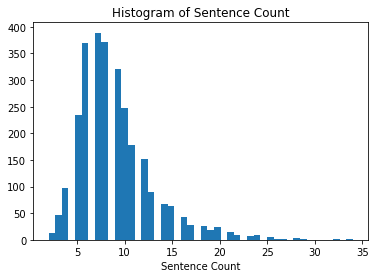

In [6]:
# sentence count 
df['sentence_count'] = df['excerpt'].apply(lambda x: x.count('.'))
print(df['sentence_count'].describe())
plt.hist(df.sentence_count, bins='auto')
plt.title('Histogram of Sentence Count')
plt.xlabel('Sentence Count')
plt.show();

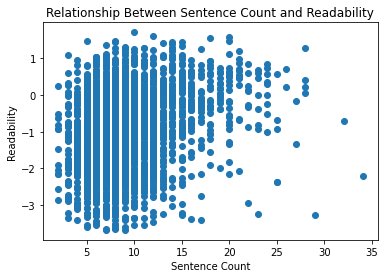

In [7]:
plt.scatter(df.sentence_count, df.target)
plt.xlabel('Sentence Count')
plt.ylabel('Readability')
plt.title('Relationship Between Sentence Count and Readability');

In [8]:
df[df['target'] >1]['excerpt'][65]

'The big brown automobile gave three honks as it swung around the corner from Church Street. Roger Morton, raking leaves in the yard beside his house, threw down his rake and vaulted over the gate.\n"Good afternoon, sir," he called to his grandfather, saluting, soldier fashion.\n"Good afternoon, son. I stopped to tell you that those pumpkins are ready for you. If you\'ll hop in now we can go out and get them and I\'ll bring you back again."\n"Good enough!" exclaimed Roger. "I\'ll tell Mother I\'m going. She may have some message for Grandmother," and he vaulted back over the gate and dashed up the steps.\nIn a minute he was out again and climbing into the car.\n"Where are the girls this afternoon?" inquired Mr. Emerson, as he threw in the clutch and started toward the outskirts of Rosemont where he had land enough to allow him to do a little farming.'

### Preview Text

In [9]:
# preview easy text
print('Target of Easiest Text: ', round(df['target'].max(),2))
print(df.iloc[df.target.argmax(),:]['excerpt'])

Target of Easiest Text:  1.71
When you think of dinosaurs and where they lived, what do you picture? Do you see hot, steamy swamps, thick jungles, or sunny plains? Dinosaurs lived in those places, yes. But did you know that some dinosaurs lived in the cold and the darkness near the North and South Poles?
This surprised scientists, too. Paleontologists used to believe that dinosaurs lived only in the warmest parts of the world. They thought that dinosaurs could only have lived in places where turtles, crocodiles, and snakes live today. Later, these dinosaur scientists began finding bones in surprising places.
One of those surprising fossil beds is a place called Dinosaur Cove, Australia. One hundred million years ago, Australia was connected to Antarctica. Both continents were located near the South Pole. Today, paleontologists dig dinosaur fossils out of the ground. They think about what those ancient bones must mean.


In [10]:
# preview difficult text 
print('Target of Most Difficult Text: ', round(df['target'].min(),2))
print(df.iloc[df.target.argmin(),:]['excerpt'])

Target of Most Difficult Text:  -3.68
The commutator is peculiar, consisting of only three segments of a copper ring, while in the simplest of other continuous current generators several times that number exist, and frequently 120! segments are to be found. These three segments are made so as to be removable in a moment for cleaning or replacement. They are mounted upon a metal support, and are surrounded on all sides by a free air space, and cannot, therefore, lose their insulated condition. This feature of air insulation is peculiar to this system, and is very important as a factor in the durability of the commutator. Besides this, the commutator is sustained by supports carried in flanges upon the shaft, which flanges, as an additional safeguard, are coated all over with hard rubber, one of the finest known insulators. It may be stated, without fear of contradiction, that no other commutator made is so thoroughly insulated and protected. The three commutator segments virtually const

In [11]:
# import libraries
import re 
from collections import defaultdict
import nltk 
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer

# create list of stop words, punctuation
stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``']

# create function that removes punctuation and stop words
def process_text(text):
    text = str(text)
    cleaned = re.sub('\W+', ' ', text)
    tokens = nltk.word_tokenize(cleaned)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    joined_words = ' '.join(stopwords_removed)
    return joined_words

# create new column with processed text 
df['processed_text'] = df['excerpt'].apply(process_text)
df.head()

,id,url_legal,license,excerpt,target,standard_error,word_count,sentence_count,processed_text
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,179,11,young people returned ballroom presented decid...
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,169,10,dinner time mrs fayre somewhat silent eyes res...
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,166,11,roger predicted snow departed quickly came two...
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,164,5,outside palace great garden walled round fille...
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,147,5,upon time three bears lived together house woo...


one day           164
united states     100
years ago          77
long time          58
years old          58
every day          57
could see          57
little girl        56
old man            49
new york           46
little boy         44
let us             44
every one          43
two three          41
one side           38
carbon dioxide     38
one another        35
many different     34
one two            33
next day           33
dtype: int64


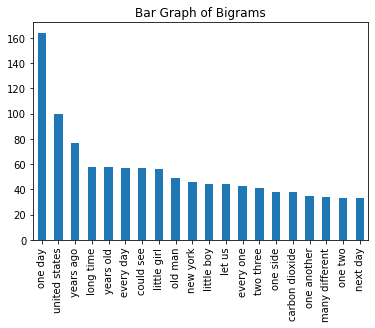

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
train_docs = df["processed_text"].tolist()

cv = CountVectorizer(lowercase = True, 
                     ngram_range = (2,2), 
                     max_features=10000,
                     min_df = 1, 
                     max_df = 0.8) 
sparse_train = cv.fit_transform(train_docs)

counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

print(counts.sum().sort_values(ascending=False)[:20])
counts.sum().sort_values(ascending=False)[:20].plot.bar()
plt.title('Bar Graph of Bigrams');

In [13]:
sparse_train

<2834x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 29835 stored elements in Compressed Sparse Row format>

world war ii                17
one two three               11
long time ago               10
000 years ago               10
traumatic brain injury       9
let us go                    9
eight years old              8
million years ago            8
one day mother               7
one day saw                  7
cat gives dog                7
old man said                 7
little half chick            7
cold cat gives               7
government united states     7
long term memory             7
red riding hood              6
planet solar system          6
cotton seed oil              6
mid ocean ridge              6
dtype: int64


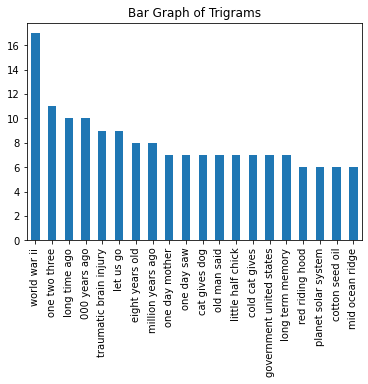

In [14]:
cv = CountVectorizer(lowercase = True, 
                     ngram_range = (3,3), 
                     max_features=10000,
                     min_df = 1, 
                     max_df = 0.8) 
sparse_train = cv.fit_transform(train_docs)

counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

print(counts.sum().sort_values(ascending=False)[:20])
counts.sum().sort_values(ascending=False)[:20].plot.bar()
plt.title('Bar Graph of Trigrams');

### EDA of Easy, Medium, Difficult Texts

In [15]:
df['target'].describe()

count    2834.000000
mean       -0.959319
std         1.033579
min        -3.676268
25%        -1.690320
50%        -0.912190
75%        -0.202540
max         1.711390
Name: target, dtype: float64

In [16]:
# divide into easy, medium, difficult 
r = (df['target'].min() - df['target'].max()) /3
diff_min = round(df['target'].min(),2)
diff_max = round(df['target'].min() - r,2)
med_max  = round(diff_max - r,2)
easy_max = round(med_max - r, 2)

print(r)

print('difficult text range:', diff_min, diff_max)
print('medium text range: ', diff_max, med_max)
print('easy text range: ', med_max, easy_max)

-1.7958858666666666
difficult text range: -3.68 -1.88
medium text range:  -1.88 -0.08
easy text range:  -0.08 1.72


In [17]:
diff_df = df[df['target'] < diff_max]
diff_df.head()

,id,url_legal,license,excerpt,target,standard_error,word_count,sentence_count,processed_text
10,c57b50918,NaN,NaN,It was believed by the principal men of Virgin...,-3.081337,0.553260,186,5,believed principal men virginia talbot sympath...
11,8d8a2667f,NaN,NaN,This Pedrarias was seventy-two years old. He w...,-2.145248,0.518351,159,9,pedrarias seventy two years old good birth ric...
23,66f0a9ff1,NaN,NaN,If nature afflicts in one direction she freque...,-2.386485,0.526079,162,6,nature afflicts one direction frequently makes...
45,2dc93434f,NaN,NaN,"He followed us, hopping in the grass or from r...",-1.926422,0.545729,147,12,followed us hopping grass rose bush rose bush ...
71,6e7e7ea91,NaN,NaN,"Joel sat bolt upright as well as he could, bei...",-1.968100,0.474456,195,4,joel sat bolt upright well could crammed big f...


In [18]:
diff_df.excerpt[11]

'This Pedrarias was seventy-two years old. He was of good birth and rich, and was the father of a large and interesting family, which he prudently left behind him in Spain. His wife, however, insisted on going with him to the New World. Whether or not this was a proof of wifely devotion—and if it was, it is the only thing in history to his credit—or of an unwillingness to trust Pedrarias out of her sight, which is more likely, is not known. At any rate, she went along.\nPedrarias, up to the time of his departure from Spain, had enjoyed two nick-names, El Galan and El Justador. He had been a bold and dashing cavalier in his youth, a famous tilter in tournaments in his middle age, and a hard-fighting soldier all his life. His patron was Bishop Fonseca. Whatever qualities he might possess for the important work about to be devolved upon him would be developed later.'

In [19]:
med_df = df[df.target<med_max]
med_df = med_df[med_df.target>diff_max]
med_df.target.describe()

count    1671.000000
mean       -0.952136
std         0.502308
min        -1.877798
25%        -1.376975
50%        -0.929455
75%        -0.544866
max        -0.080095
Name: target, dtype: float64

### Easy Text

In [20]:
easy_df = df[df['target'] > med_max]
easy_df.head()

,id,url_legal,license,excerpt,target,standard_error,word_count,sentence_count,processed_text
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,147,5,upon time three bears lived together house woo...
14,587502a70,NaN,NaN,"Aunt Abigail was gone, Eleanor was gone. The r...",0.245806,0.491793,181,11,aunt abigail gone eleanor gone room quite empt...
20,a9ebe5d33,NaN,NaN,"Then the man took off his hat and walked away,...",0.281178,0.510595,155,6,man took hat walked away philip sister went ho...
21,47e98a5c8,NaN,NaN,At that moment the queen came out through the ...,0.278203,0.484045,182,3,moment queen came palace door prince dazzled b...
25,e6181a3fb,NaN,NaN,When Nick Ribsam set out to find his missing s...,0.633139,0.515780,157,9,nick ribsam set find missing sister nellie mad...


In [21]:
easy_df.excerpt[25]

'When Nick Ribsam set out to find his missing sister Nellie, he made the search as thorough as possible.\nThe first house at which he stopped was that of Mr. Marston, which, it will be remembered, was only a short distance away from his own home. There, to his disappointment, he learned that their little girl had not been at school that day, and consequently they could tell him nothing.\nWithout waiting longer than to give a few words of explanation he resumed his trot, and soon after turned into the lane leading to the home of Mr. Kilgore. He found that both Bobby and Sallie had been to school, but they had nothing to tell. When we are more than usually anxious to learn something, it seems that every one whom we meet is stupid beyond endurance. If we are in a strange place and apply for information, the ignorance of nearly every person is exasperating.'

said      458
one       456
little    404
would     296
could     263
time      247
people    239
went      229
like      224
day       223
mother    211
came      202
see       193
go        186
get       181
made      174
called    166
old       163
away      161
two       155
dtype: int64


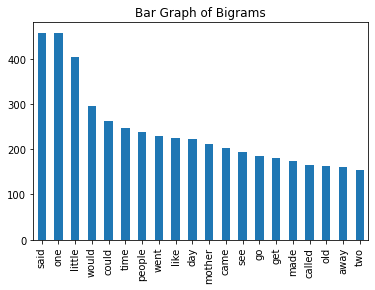

In [22]:
easy_train_docs = easy_df["processed_text"].tolist()

cv = CountVectorizer(lowercase = True, 
                     ngram_range = (1,1), 
                     max_features=10000,
                     min_df = 1, 
                     max_df = 0.8) 
sparse_train = cv.fit_transform(easy_train_docs)

easy_counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

easy_counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

print(easy_counts.sum().sort_values(ascending=False)[:20])
easy_counts.sum().sort_values(ascending=False)[:20].plot.bar()
plt.title('Bar Graph of Bigrams');

one day          94
little girl      40
little boy       27
every day        23
years old        22
cat dog          22
could see        21
upon time        18
united states    17
thought would    17
let go           16
let us           16
said mother      16
old woman        16
long time        16
poor little      14
next day         13
mother said      13
take care        12
every one        12
dtype: int64


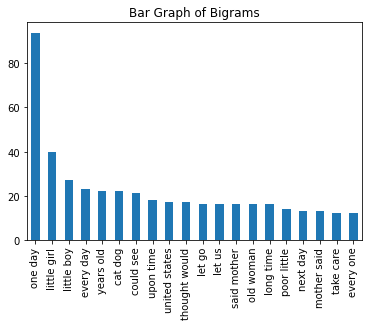

In [23]:
easy_train_docs = easy_df["processed_text"].tolist()

cv = CountVectorizer(lowercase = True, 
                     ngram_range = (2,2), 
                     max_features=10000,
                     min_df = 1, 
                     max_df = 0.8) 
sparse_train = cv.fit_transform(easy_train_docs)

easy_counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

easy_counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

print(easy_counts.sum().sort_values(ascending=False)[:20])
easy_counts.sum().sort_values(ascending=False)[:20].plot.bar()
plt.title('Bar Graph of Bigrams');

let us go                       9
one two three                   7
one day mother                  7
red riding hood                 6
important occupation without    5
dog follow butterfly            5
climbed climbed climbed         5
world war ii                    5
one day went                    5
one day saw                     5
cat dog follow                  5
great huge bear                 4
small wee bear                  4
said important occupation       4
three four five                 4
kitty would run                 4
cat dog slow                    4
fast cat dog                    4
little girl wants               4
said let us                     4
dtype: int64


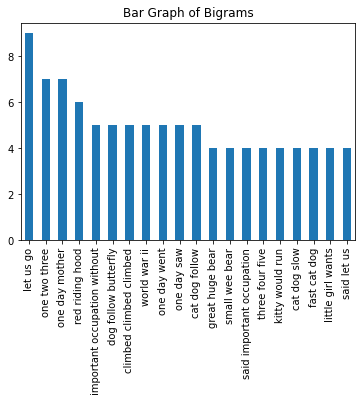

In [24]:
easy_train_docs = easy_df["processed_text"].tolist()

cv = CountVectorizer(lowercase = True, 
                     ngram_range = (3,3), 
                     max_features=10000,
                     min_df = 1, 
                     max_df = 0.8) 
sparse_train = cv.fit_transform(easy_train_docs)

easy_counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

easy_counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

print(easy_counts.sum().sort_values(ascending=False)[:20])
easy_counts.sum().sort_values(ascending=False)[:20].plot.bar()
plt.title('Bar Graph of Bigrams');

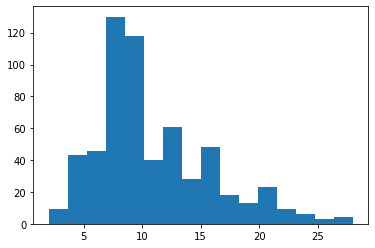

In [25]:
plt.hist(easy_df['sentence_count'], bins='auto');

### Medium Text

one       1174
would      654
little     643
said       601
could      547
time       538
like       504
two        462
made       460
people     431
great      424
many       422
first      410
called     409
water      399
old        393
way        382
came       370
man        367
also       360
dtype: int64


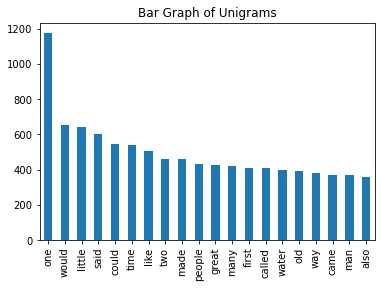

In [26]:
med_train_docs = med_df["processed_text"].tolist()

cv = CountVectorizer(lowercase = True, 
                     ngram_range = (1,1), 
                     max_features=10000,
                     min_df = 1, 
                     max_df = 0.8) 
sparse_train = cv.fit_transform(med_train_docs)

med_counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

med_counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

print(med_counts.sum().sort_values(ascending=False)[:20])
med_counts.sum().sort_values(ascending=False)[:20].plot.bar()
plt.title('Bar Graph of Unigrams');

one day           68
united states     65
years ago         49
old man           39
years old         34
could see         33
new york          32
long time         31
every one         28
every day         28
two three         27
carbon dioxide    25
let us            23
one side          23
come back         22
world war         22
many different    22
one thing         21
great britain     19
working memory    19
dtype: int64


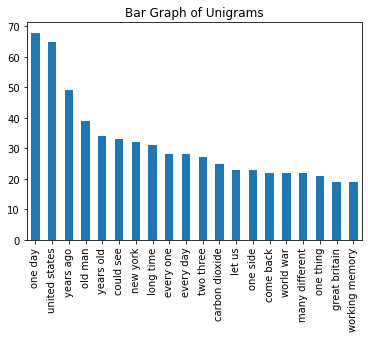

In [27]:
cv = CountVectorizer(lowercase = True, 
                     ngram_range = (2,2), 
                     max_features=10000,
                     min_df = 1, 
                     max_df = 0.8) 
sparse_train = cv.fit_transform(med_train_docs)

med_counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

med_counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

print(med_counts.sum().sort_values(ascending=False)[:20])
med_counts.sum().sort_values(ascending=False)[:20].plot.bar()
plt.title('Bar Graph of Unigrams');

### Difficult Text

one        324
two        190
would      186
may        170
great      148
first      146
made       145
upon       135
time       134
water      128
well       127
many       119
used       115
also       111
like       109
much       103
must        96
could       95
without     91
little      90
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


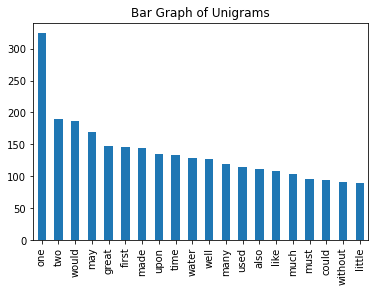

In [28]:
diff_train_docs = diff_df["processed_text"].tolist()

cv = CountVectorizer(lowercase = True, 
                     ngram_range = (1,1), 
                     max_features=10000,
                     min_df = 1, 
                     max_df = 0.8) 
sparse_train = cv.fit_transform(diff_train_docs)

diff_counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

diff_counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

print(diff_counts.sum().sort_values(ascending=False)[:20])
print(diff_counts.sum().sort_values(ascending=False)[:20].plot.bar())
plt.title('Bar Graph of Unigrams');

per cent               20
united states          18
years ago              16
per second             13
long time              11
well known             11
per hour                9
000 000                 9
experiments made        9
one side                8
real world              8
oceanic lithosphere     7
short time              7
fly wheel               7
first time              7
one hundred             7
alpha power             7
new york                7
000 rubles              7
often used              7
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


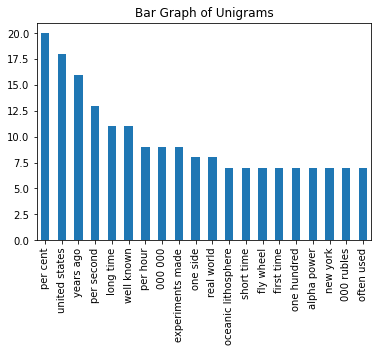

In [29]:
cv = CountVectorizer(lowercase = True, 
                     ngram_range = (2,2), 
                     max_features=10000,
                     min_df = 1, 
                     max_df = 0.8) 
sparse_train = cv.fit_transform(diff_train_docs)

diff_counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

diff_counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

print(diff_counts.sum().sort_values(ascending=False)[:20])
print(diff_counts.sum().sort_values(ascending=False)[:20].plot.bar())
plt.title('Bar Graph of Unigrams');

meters per second             5
kilometers per hour           5
human computer interaction    4
east kilometers per           4
mid ocean ridge               4
000 000 000                   3
history ancient sculpture     3
walking east kilometers       3
year certificates ninety      3
ft 16 ft                      3
du toit pan                   3
justified declaring war       3
freed military service        3
discrete cosine transform     3
metres per second             3
80 per cent                   3
000 years ago                 3
sample delivery system        3
top level domains             3
franco prussian war           2
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


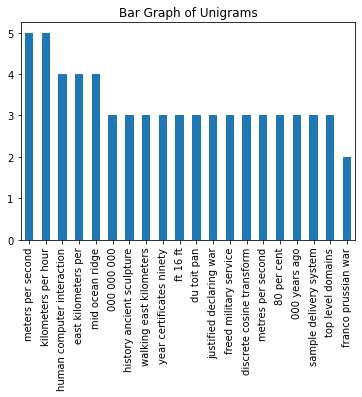

In [30]:
cv = CountVectorizer(lowercase = True, 
                     ngram_range = (3,3), 
                     max_features=10000,
                     min_df = 1, 
                     max_df = 0.8) 
sparse_train = cv.fit_transform(diff_train_docs)

diff_counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

diff_counts = pd.DataFrame(sparse_train.toarray(),
                      columns=cv.get_feature_names())

print(diff_counts.sum().sort_values(ascending=False)[:20])
print(diff_counts.sum().sort_values(ascending=False)[:20].plot.bar())
plt.title('Bar Graph of Unigrams');